In [2]:
# I want to track the changes in votes by party for congressional vs presidentail elections. My initial question is whether polarization can be seen starting at the federal level and filtering down to the local or vice versa or whether they happened at the same time.


In [3]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [4]:
cong_data = pd.read_csv('countypres_20002016.csv')
print(cong_data.head())

cong_data_by_party = cong_data.groupby(['year', 'state', 'party']).count()
print(cong_data_by_party.head(5))

print(cong_data.columns)

   year    state state_po   county    FIPS     office       candidate  \
0  2000  Alabama       AL  Autauga  1001.0  President         Al Gore   
1  2000  Alabama       AL  Autauga  1001.0  President  George W. Bush   
2  2000  Alabama       AL  Autauga  1001.0  President     Ralph Nader   
3  2000  Alabama       AL  Autauga  1001.0  President           Other   
4  2000  Alabama       AL  Baldwin  1003.0  President         Al Gore   

        party  candidatevotes  totalvotes   version  
0    democrat          4942.0       17208  20191203  
1  republican         11993.0       17208  20191203  
2       green           160.0       17208  20191203  
3         NaN           113.0       17208  20191203  
4    democrat         13997.0       56480  20191203  
                         state_po  county  FIPS  office  candidate  \
year state   party                                                   
2000 Alabama democrat          67      67    67      67         67   
             green         

In [5]:
cong_data_by_al = cong_data[cong_data['state'] == 'Alabama']
#print(cong_data_by_al.head(25))
w = list(cong_data_by_al['county'])
w_2 = cong_data_by_al['county']
print(type(w_2))
print(w_2.head())


<class 'pandas.core.series.Series'>
0    Autauga
1    Autauga
2    Autauga
3    Autauga
4    Baldwin
Name: county, dtype: object


In [6]:
data_of_county = cong_data_by_al.loc[cong_data_by_al['county'] == 'Autauga']
democrats_by_county = data_of_county.loc[data_of_county['party'] == 'democrat']
print(democrats_by_county)
democrats_by_county_votes = list(democrats_by_county['candidatevotes'])
#print(democrats_by_county_votes)
#print(len(list(democrats_by_county['year'])))

       year    state state_po   county    FIPS     office        candidate  \
0      2000  Alabama       AL  Autauga  1001.0  President          Al Gore   
12464  2004  Alabama       AL  Autauga  1001.0  President       John Kerry   
21815  2008  Alabama       AL  Autauga  1001.0  President     Barack Obama   
31166  2012  Alabama       AL  Autauga  1001.0  President     Barack Obama   
40517  2016  Alabama       AL  Autauga  1001.0  President  Hillary Clinton   

          party  candidatevotes  totalvotes   version  
0      democrat          4942.0       17208  20191203  
12464  democrat          4758.0       20081  20191203  
21815  democrat          6093.0       23641  20191203  
31166  democrat          6363.0       23932  20191203  
40517  democrat          5936.0       24973  20191203  


In [7]:
data_of_county_2 = cong_data_by_al.loc[cong_data_by_al['year'] == 2000]
data_of_county_2_b = data_of_county_2.loc[data_of_county_2['party'] == 'democrat']
#print(data_of_county_2_b)
data_of_county_2_list = list(data_of_county_2_b['county'])
#print(data_of_county_2_list)


In [8]:
def by_county_graph(state, data):
    state_data = data.loc[data['state'] == state]
    data_county_2 = state_data.loc[state_data['year'] == 2000]
    data_county_2_b = data_county_2.loc[data_county_2['party'] == 'democrat']
    data_county_2_lst = list(data_county_2_b['county'])
    for county in data_county_2_lst:
        data_of_county = state_data.loc[state_data['county'] == county]
        democrats_by_county = data_of_county.loc[data_of_county['party'] == 'democrat']
        democrats_by_county_votes = list(democrats_by_county['candidatevotes'])
        republicans_by_county = data_of_county.loc[data_of_county['party'] == 'republican']
        republicans_by_county_votes = list(republicans_by_county['candidatevotes'])
        #green_by_county = data_of_county.loc[data_of_county['party'] == 'green']
        #green_by_county_votes = list(green_by_county['candidatevotes'])
        years_reported = (list(range(len(democrats_by_county_votes))))
        plt.figure(figsize=(10,8))
        ax = plt.subplot()
        plt.plot(years_reported, democrats_by_county_votes, color='blue')
        plt.plot(years_reported, republicans_by_county_votes, color='red')
        plt.title(state + ': ' + county + ' County')
        plt.xlabel('Year')
        ax.set_xticks(list(range(len(democrats_by_county_votes))))
        ax.set_xticklabels([2000, 2004, 2008, 2012, 2016])
        plt.legend(['Democrat', 'Republican'])
        plt.ylabel('Votes')
        plt.show()

In [9]:
#by_county_graph('Alabama', cong_data)

In [14]:
#by_county_graph('Pennsylvania', cong_data)

In [11]:
# Now I want to highlight the counties with the most total votes in the final year. To do this, I need to sort the list of counties that I will iterate through. Here is where the sort_values functions comes in where I specify the column and the ascending parameter with a boolean input.

def top_n_counties_graph(state, number_of_counties, data):
    state_data = data.loc[data['state'] == state]
    data_county_2 = state_data.loc[state_data['year'] == 2016]
    data_county_2_a = data_county_2.sort_values(by=['totalvotes'], ascending=False)
    data_county_2_b = data_county_2_a.loc[data_county_2_a['party'] == 'democrat']
    data_county_2_lst = list(data_county_2_b['county'])
    for county in data_county_2_lst[0: number_of_counties]:
        data_of_county = state_data.loc[state_data['county'] == county]
        democrats_by_county = data_of_county.loc[data_of_county['party'] == 'democrat']
        democrats_by_county_votes = list(democrats_by_county['candidatevotes'])
        republicans_by_county = data_of_county.loc[data_of_county['party'] == 'republican']
        republicans_by_county_votes = list(republicans_by_county['candidatevotes'])
        #green_by_county = data_of_county.loc[data_of_county['party'] == 'green']
        #green_by_county_votes = list(green_by_county['candidatevotes'])
        years_reported = (list(range(len(democrats_by_county_votes))))
        plt.figure(figsize=(10,8))
        ax = plt.subplot()
        plt.plot(years_reported, democrats_by_county_votes, color='blue')
        plt.plot(years_reported, republicans_by_county_votes, color='red')
        plt.title(state + ': ' + county + ' County')
        plt.xlabel('Year')
        ax.set_xticks(list(range(len(democrats_by_county_votes))))
        ax.set_xticklabels([2000, 2004, 2008, 2012, 2016])
        plt.legend(['Democrat', 'Republican'])
        plt.ylabel('Votes')
        plt.show()

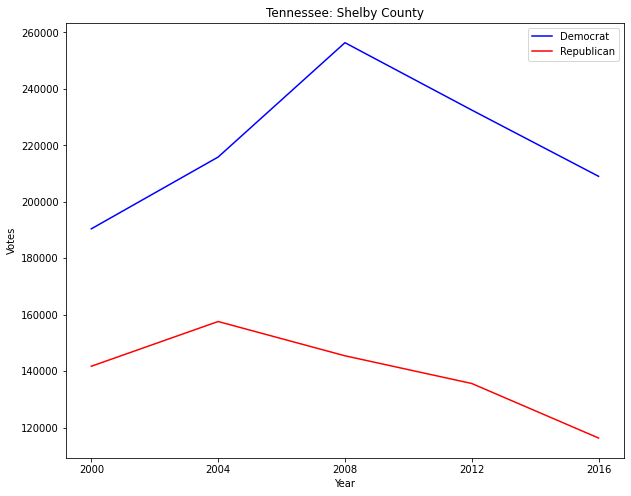

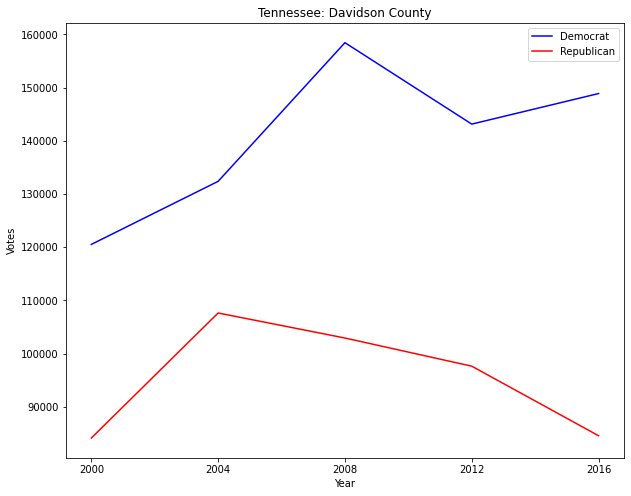

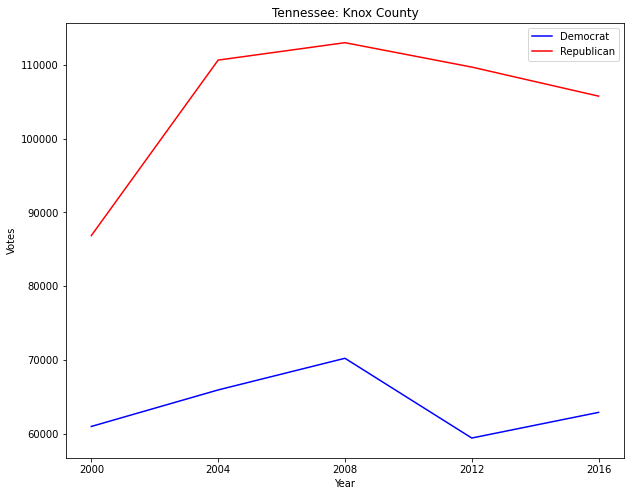

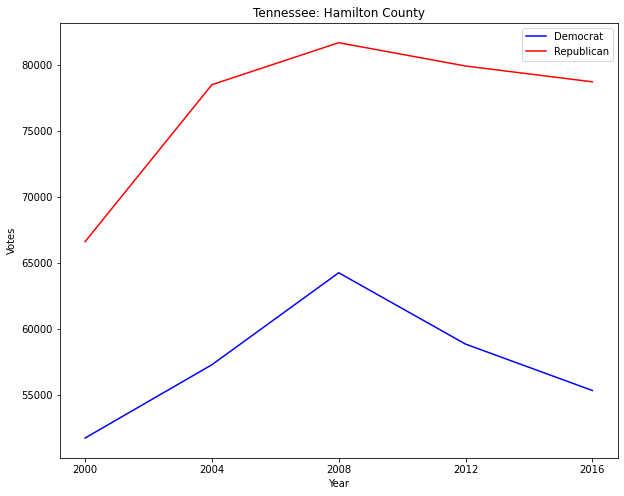

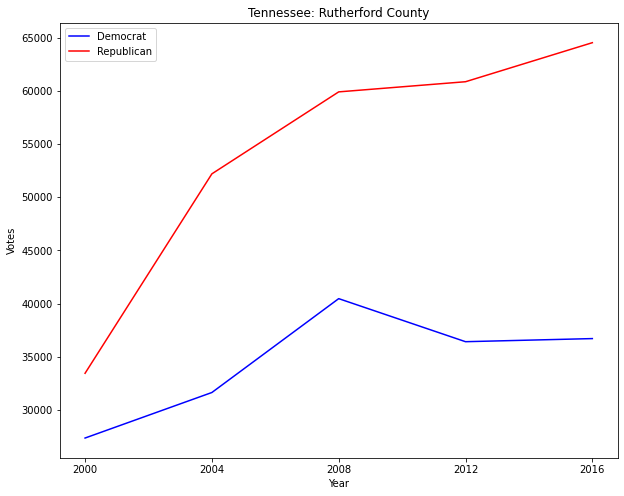

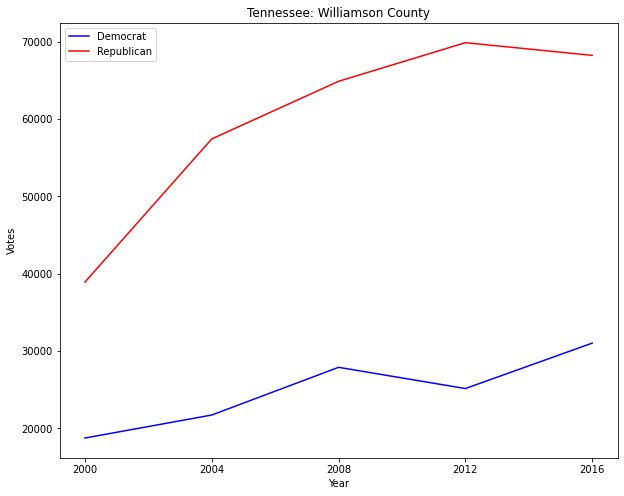

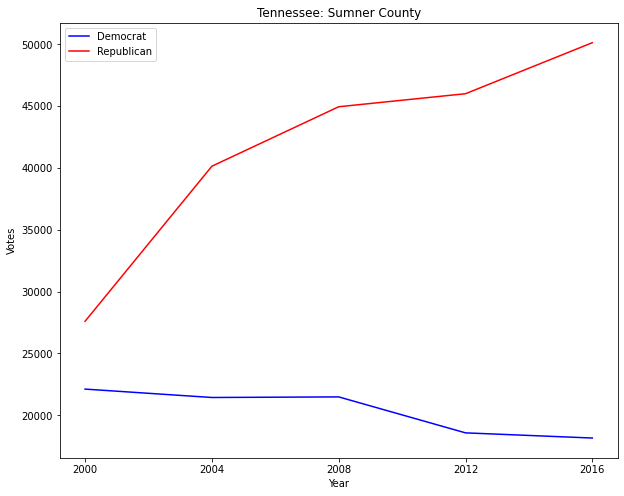

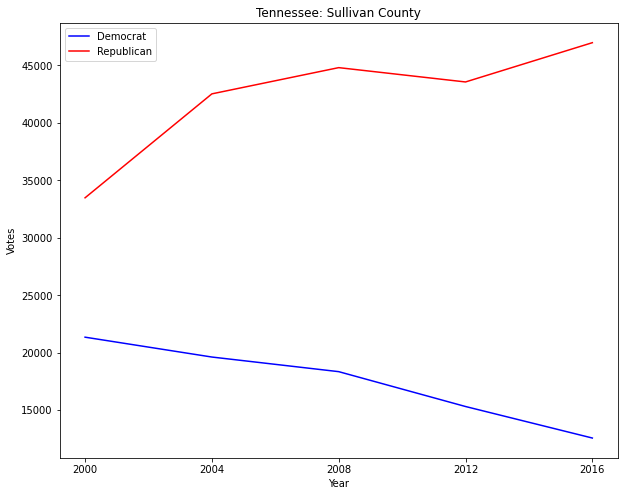

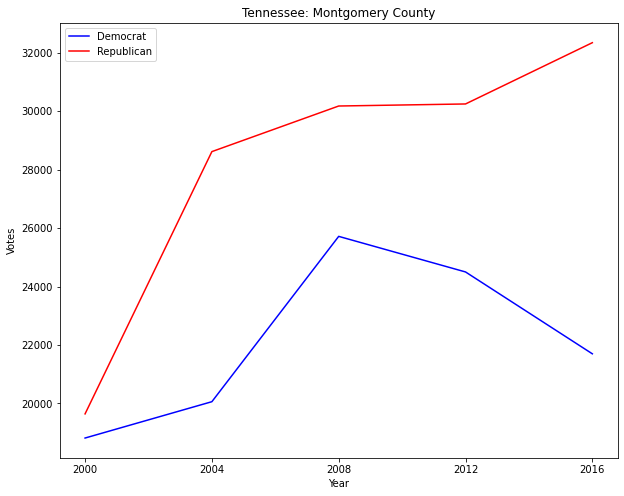

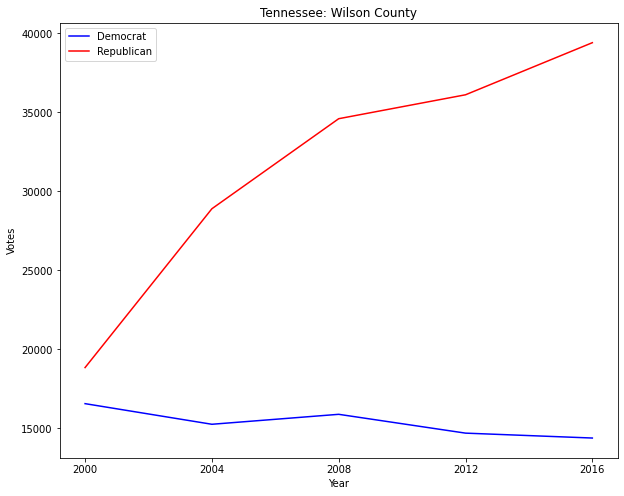

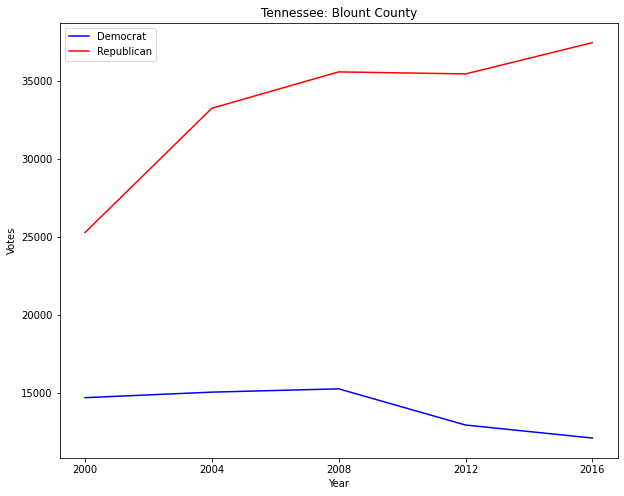

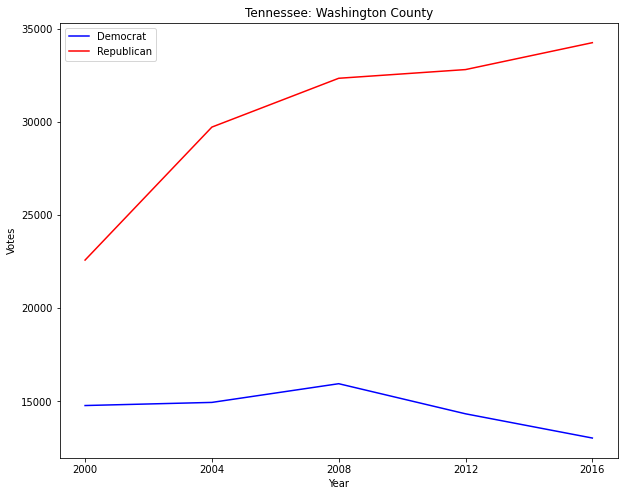

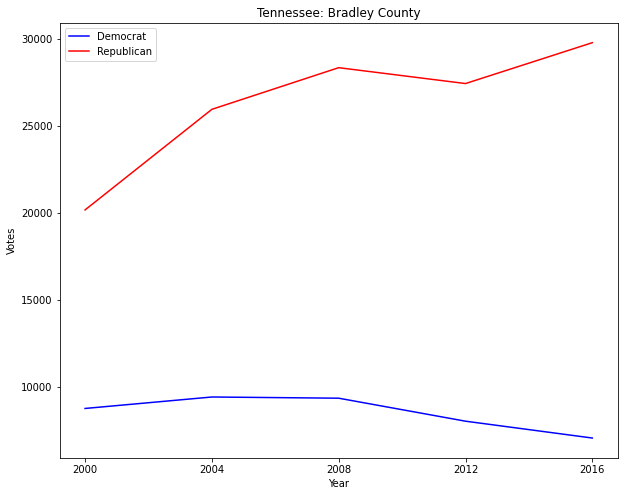

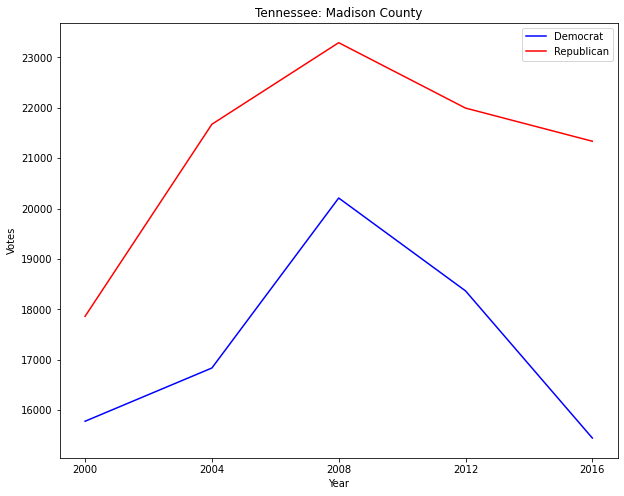

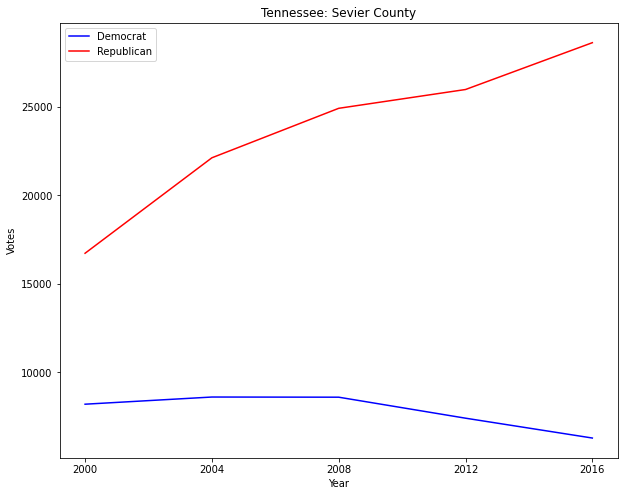

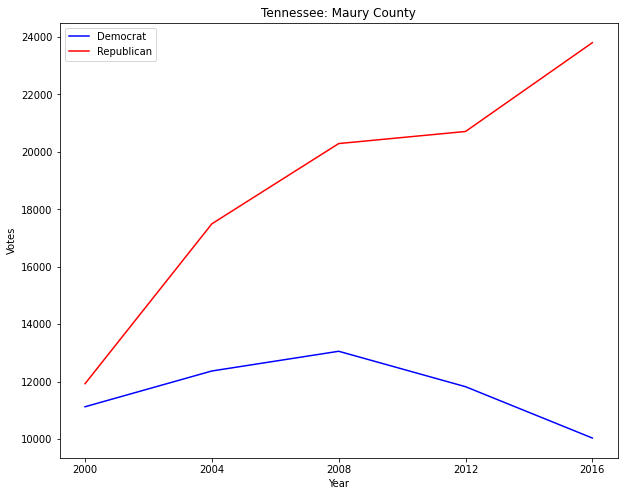

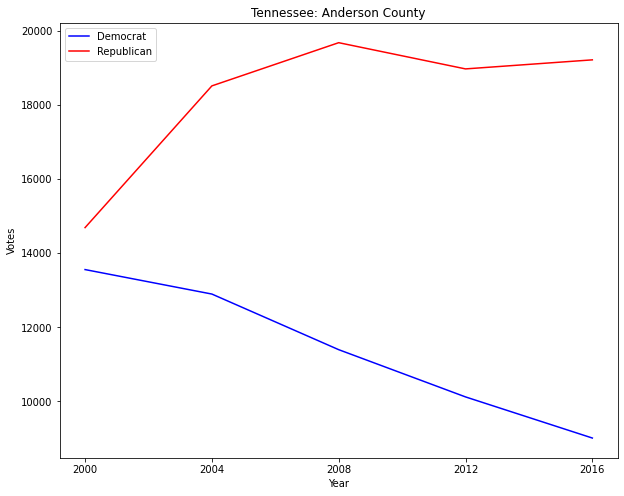

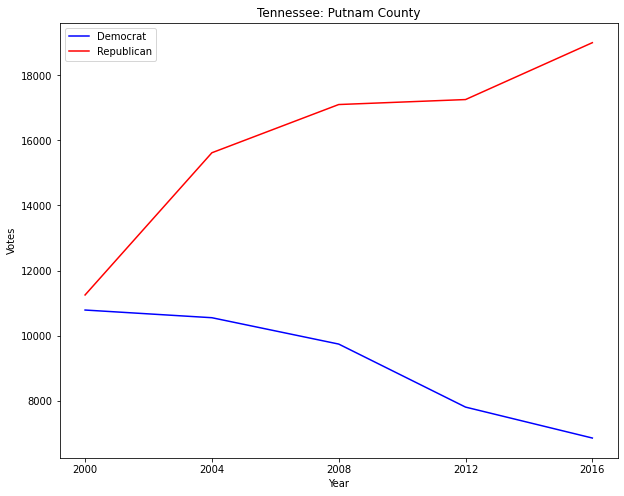

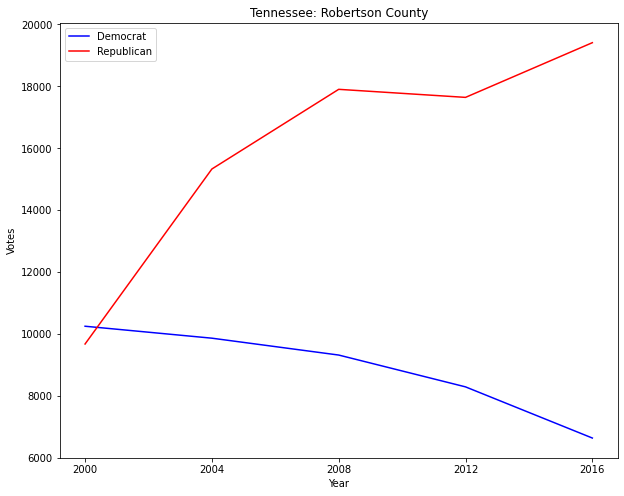

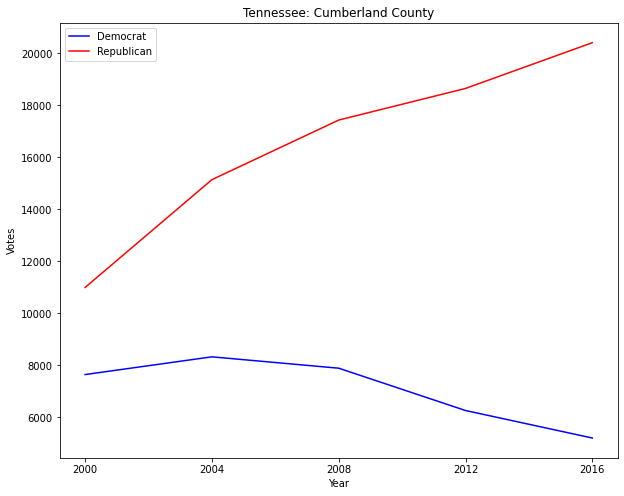

In [17]:
top_n_counties_graph('Tennessee', 20, cong_data)

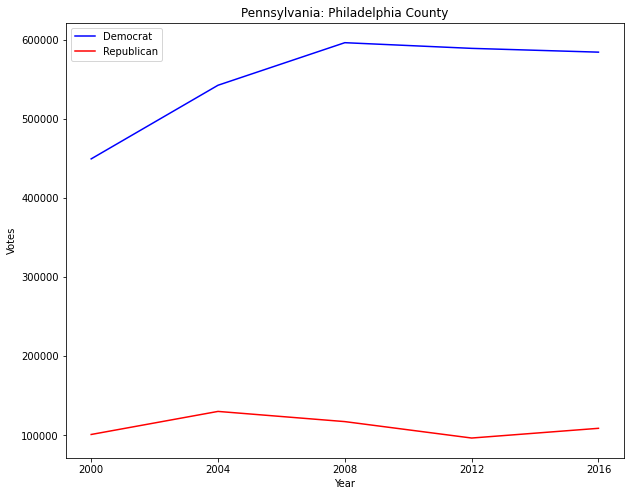

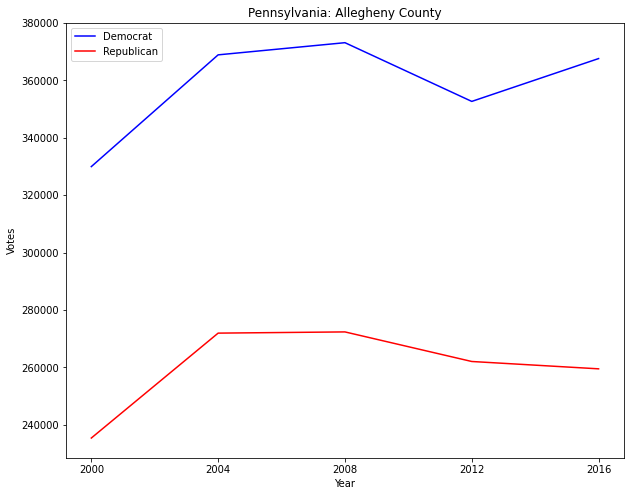

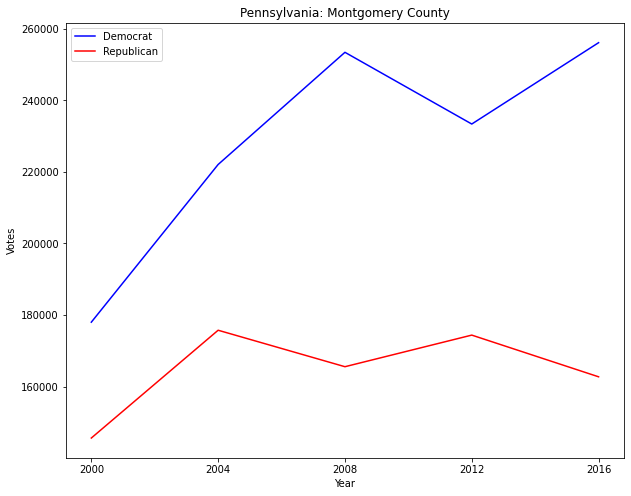

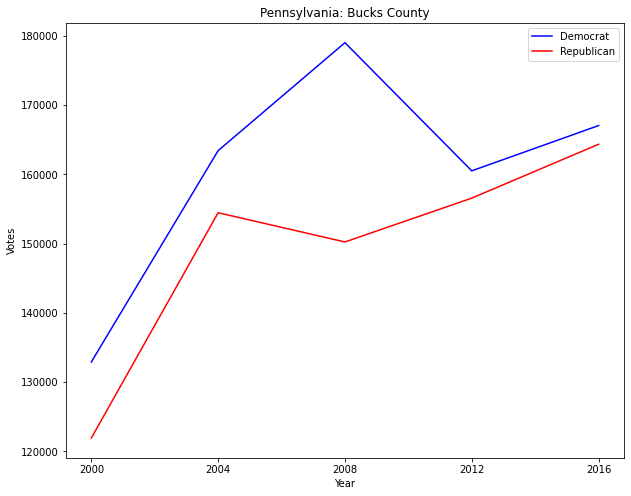

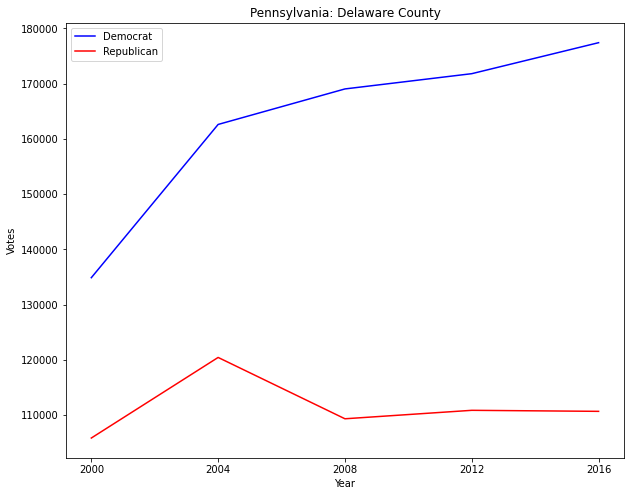

In [12]:
top_n_counties_graph('Pennsylvania', 5, cong_data)

In [13]:
# Now that I have a way to quickly visualize the votes of counties in a state, I want to be able to focus more directly on a particular county.